# Boston house dataset -- Linear Regression 

Life cycle process of Machine learning

1. data cleansing and warning.
2. define the matrics for which model is getting optimized
3. feature engineering 
4. data pre processing 
5. feature selection 
6. split the data into training and test data sets
7. model selection
8. model validation 
9

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston #loading the data from set from scikit learn

In [3]:
#boston=pd.read_csv('BostonHousing.csv')

In [4]:
boston =load_boston()

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [11]:
bos =pd.DataFrame(boston.data, columns=boston.feature_names)
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [12]:
bos.shape

(506, 13)

In [13]:
bos['target']=boston.target

In [14]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [15]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [16]:
bos.shape

(506, 14)

In [17]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

In [18]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

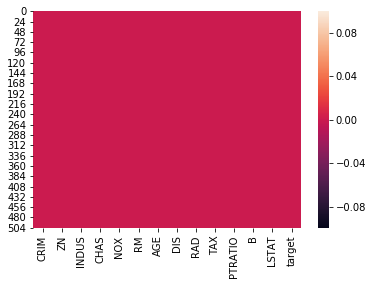

In [19]:
sns.heatmap(bos.isnull())

Summery statistics

In [20]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
""" high standard devation are present in ZN, INDUS age,TX variables , means data is spread too much data, range is high
Crim indus , Rad has mean greater then median , it means crim vraible has righ skewed data large  gap between  75th percentile  and max crim zm indus 
hence outliers are preset 
"""

' high standard devation are present in ZN, INDUS age,TX variables , means data is spread too much data, range is high\nCrim indus , Rad has mean greater then median , it means crim vraible has righ skewed data large  gap between  75th percentile  and max crim zm indus \nhence outliers are preset \n'

In [22]:
bos.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

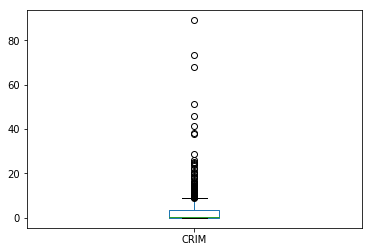

In [23]:
bos['CRIM'].plot.box()

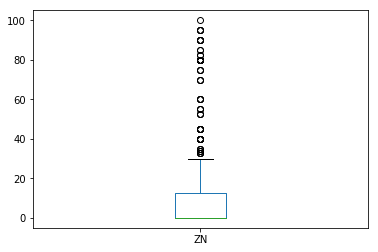

In [24]:
bos['ZN'].plot.box()

In [25]:
#bos.plot?

CRIM          AxesSubplot(0.125,0.536818;0.0945122x0.343182)
ZN         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
INDUS      AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
CHAS       AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
NOX        AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
RM         AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
AGE        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
DIS              AxesSubplot(0.125,0.125;0.0945122x0.343182)
RAD           AxesSubplot(0.238415,0.125;0.0945122x0.343182)
TAX           AxesSubplot(0.351829,0.125;0.0945122x0.343182)
PTRATIO       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
B             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
LSTAT         AxesSubplot(0.692073,0.125;0.0945122x0.343182)
target        AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

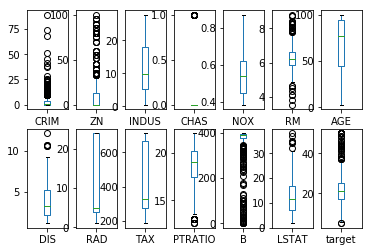

In [26]:
bos.plot(kind = 'box', subplots=True, layout=(2,7))

In [27]:
##  removing Outliers 

from  scipy.stats import zscore
z=np.abs(zscore(bos))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 0.44105193, 1.0755623 ,
        0.15968566],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.44105193, 0.49243937,
        0.10152429],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.39642699, 1.2087274 ,
        1.32424667],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 0.44105193, 0.98304761,
        0.14880191],
       [0.40776407, 0.48772236, 0.11573841, ..., 0.4032249 , 0.86530163,
        0.0579893 ],
       [0.41500016, 0.48772236, 0.11573841, ..., 0.44105193, 0.66905833,
        1.15724782]])

In [28]:
threshold =3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [29]:
z[55][1]

3.375038763517294

In [30]:
bos.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
target     1.108098
dtype: float64

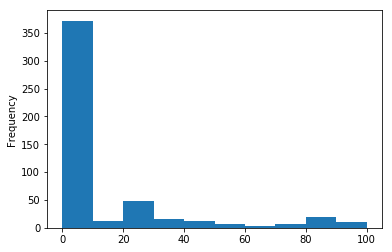

In [31]:
bos['ZN'].plot.hist()

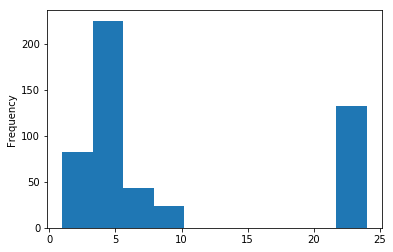

In [32]:
bos['RAD'].plot.hist()

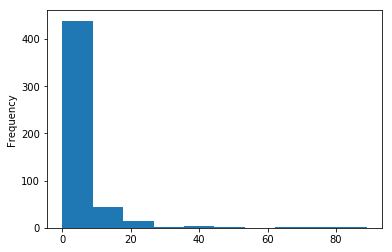

In [33]:
bos['CRIM'].plot.hist()

In [34]:
##bos['CRIM']=np.log(bos['CRIM'])
#bos['CRIM'].plot.hist()

In [35]:
from scipy.stats import boxcox  ### remove the skewness
#0 -> log transform
#.5 -> sqaure root transform
bos['CRIM']=boxcox(bos['CRIM'],0)

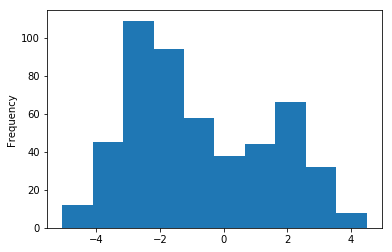

In [36]:
bos['CRIM'].plot.hist()

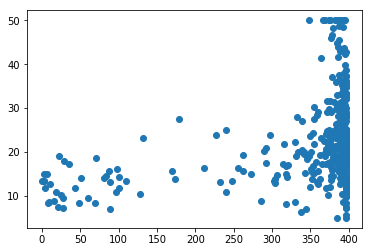

In [37]:
plt.scatter(bos['B'], bos['target'])
plt.show()

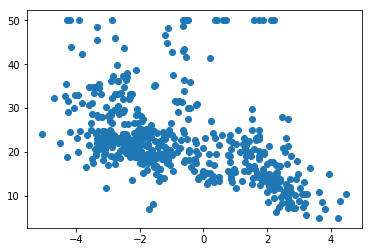

In [38]:
plt.scatter(bos['CRIM'],bos['target'])

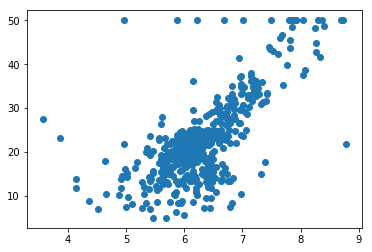

In [39]:
x=bos['RM']
y=bos['target']
plt.scatter(x,y)
plt.show()

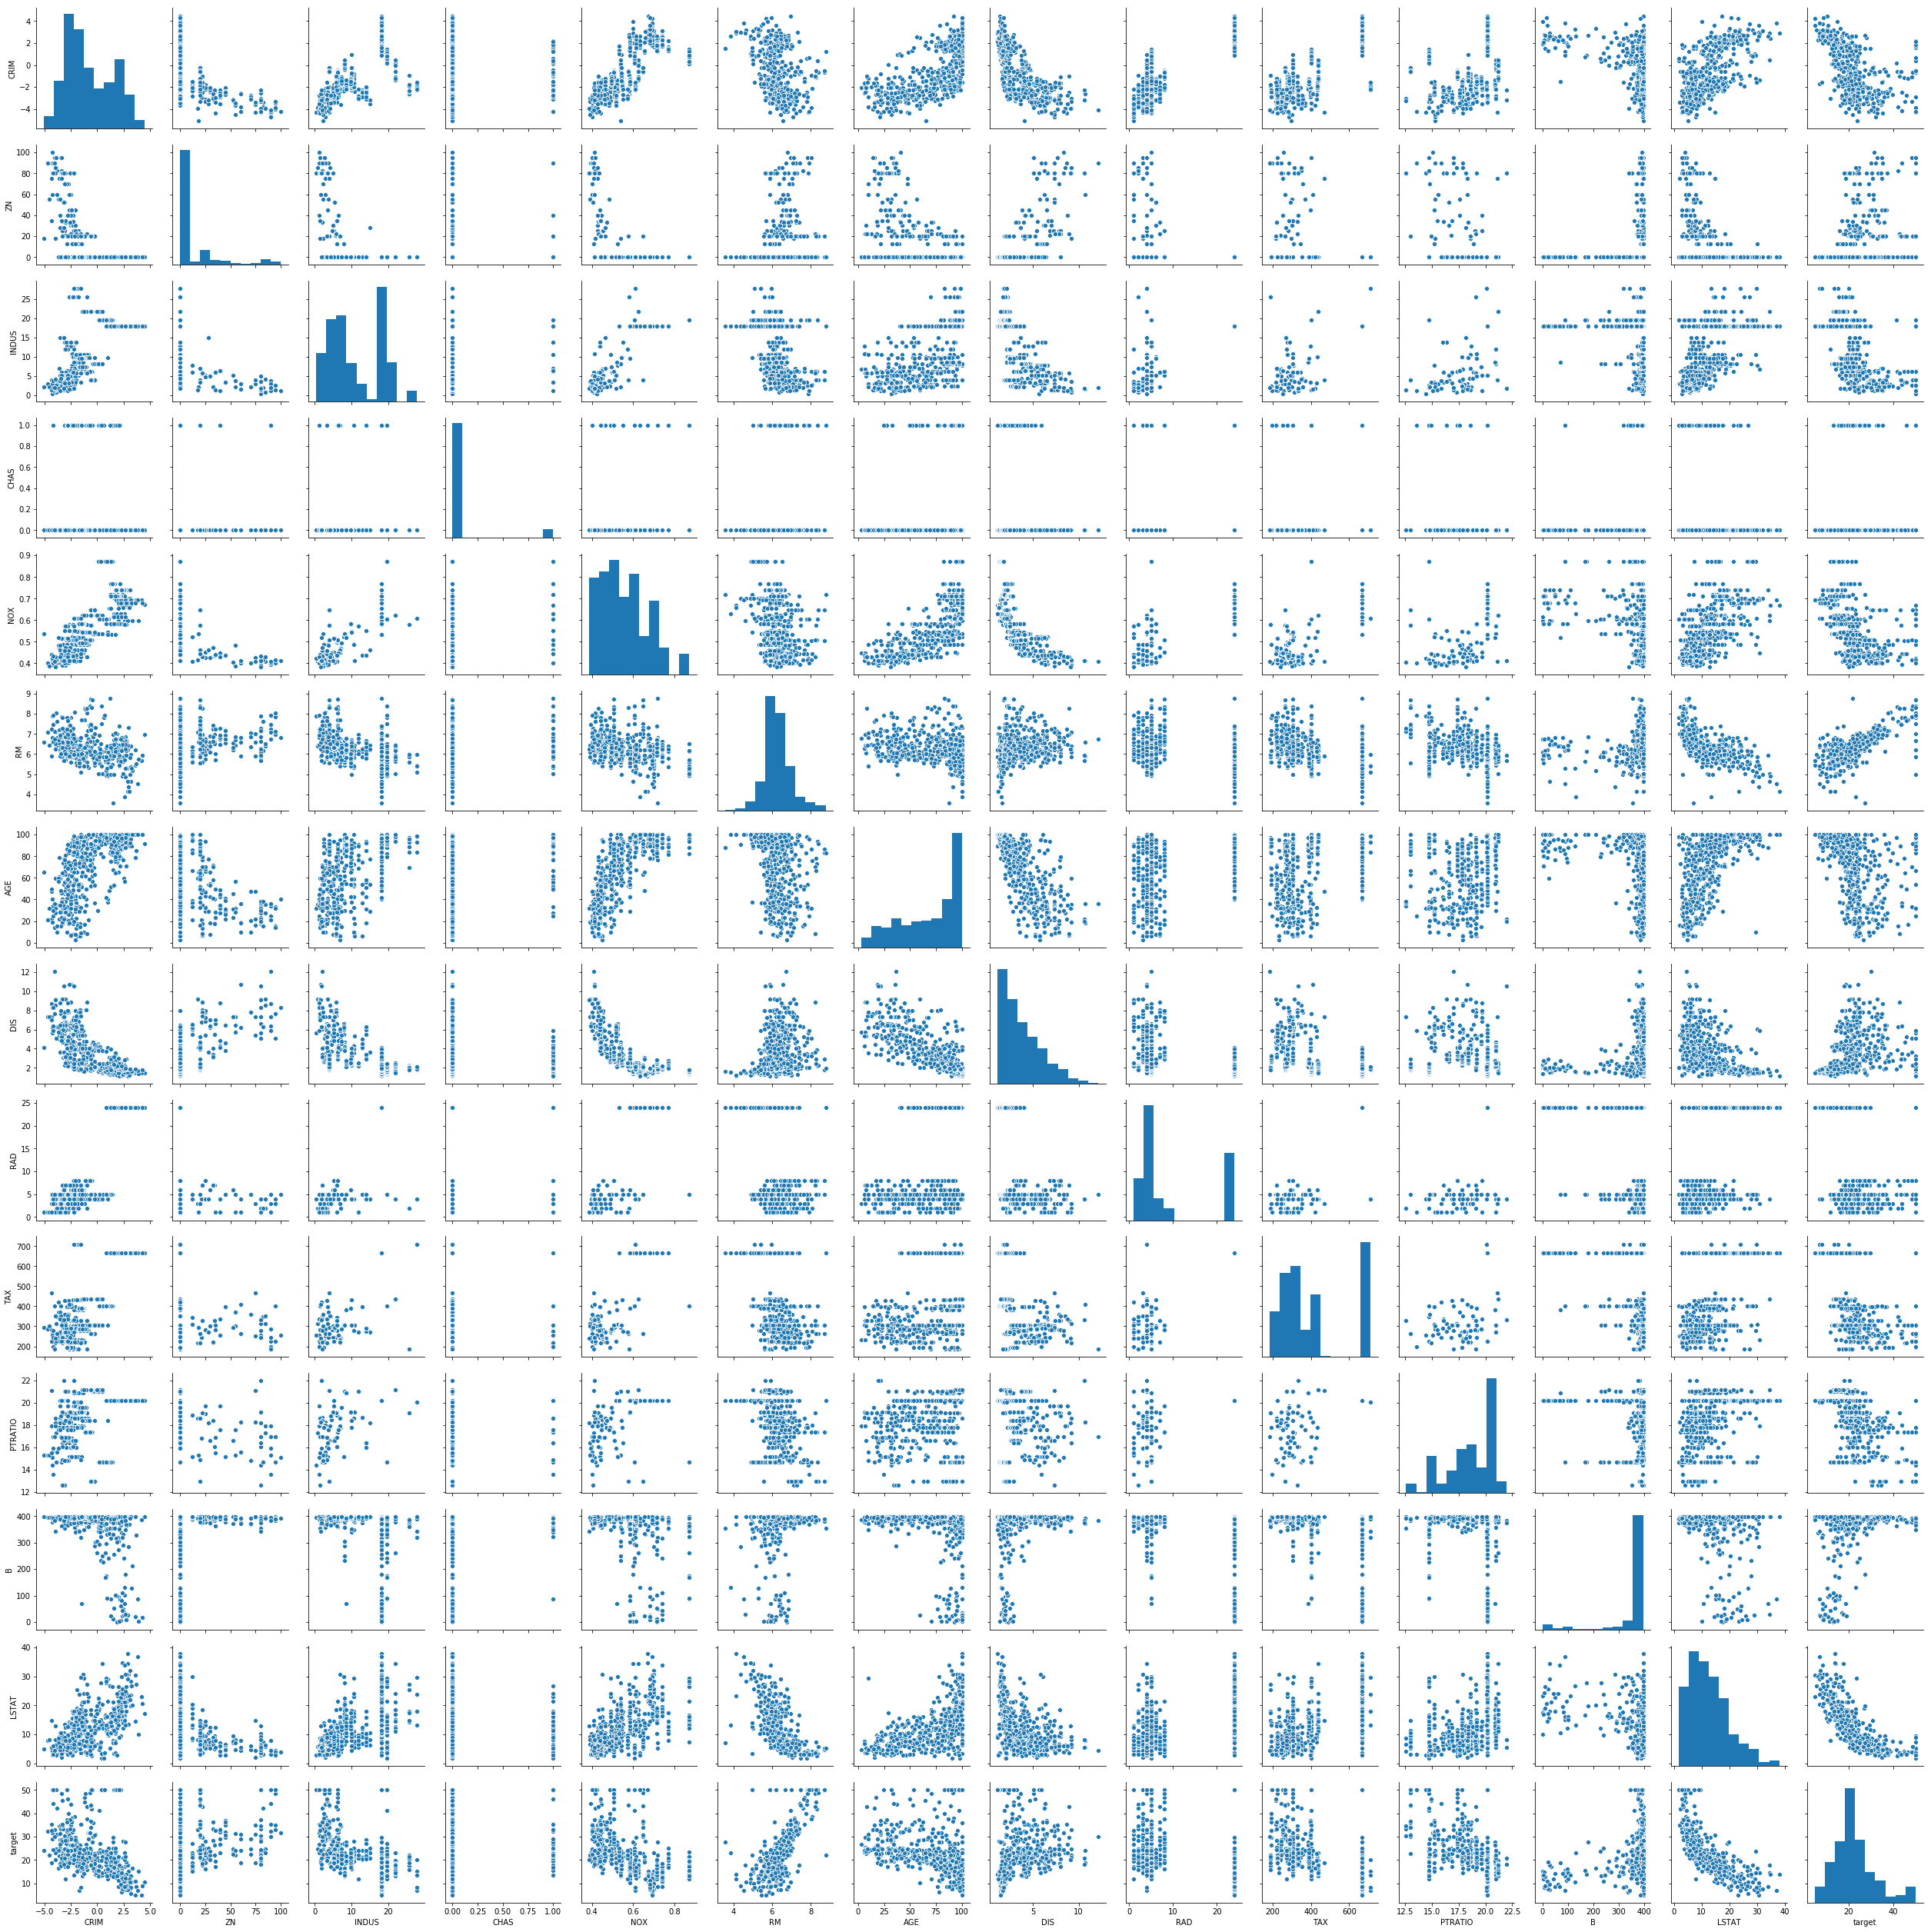

In [40]:
sns.pairplot(bos)

In [41]:
#plt.figure?

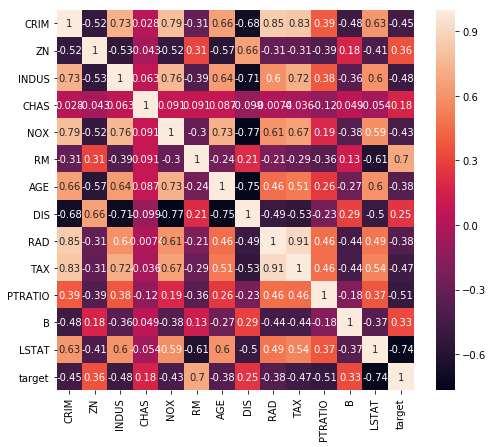

In [42]:
corr_hmap=bos.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap, annot=True)
plt.show()


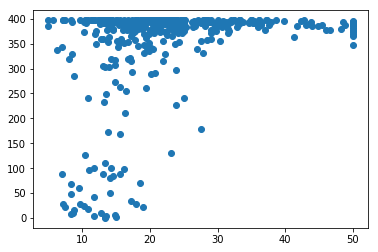

In [43]:
plt.scatter(bos['target'],bos['B'])
plt.show()

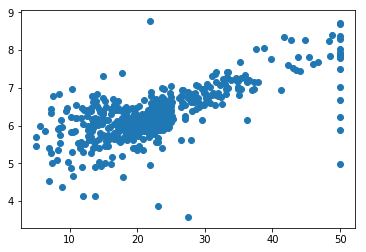

In [44]:
plt.scatter(bos['target'],bos['RM'])
plt.show()

In [45]:
#drop the lstat

bos.drop('LSTAT', axis=1, inplace= True)

In [46]:
#Lstat dropped
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,target
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,24.0
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,21.6
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,34.7
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,33.4
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,36.2


In [47]:
bos_new=bos[(z<3).all(axis=1)] # removing outliers

In [48]:
bos.shape

(506, 13)

In [49]:
bos_new.shape

(415, 13)

In [50]:
bos =bos_new
bos.shape

(415, 13)

In [51]:
x=bos.iloc[:,0:-1]
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
0,-5.064036,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,-3.600502,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,-3.601235,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,-3.430523,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,-2.672924,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90


In [52]:
y=bos.iloc[:,-1]
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [53]:
x.shape

(415, 12)

In [62]:
y.shape

(415,)

In [63]:
x_train,x_test, y_train,y_test =train_test_split(x,y,test_size =.33, random_state =42)

In [64]:
x_train.shape

(278, 12)

In [68]:
y_train.shape

(278,)

In [67]:
x_test.shape

(137, 12)

In [66]:
y_test.shape

(137,)

In [69]:
lm =LinearRegression()

In [70]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lm.coef_

array([ 4.14796426e-01, -9.48452702e-03, -4.06227602e-02,  5.37764278e-16,
       -1.23983569e+01,  8.31144766e+00, -6.77907881e-02, -1.13441493e+00,
        5.01745969e-02, -1.14702471e-02, -7.86910388e-01,  9.22717357e-03])

In [72]:
lm.intercept_

1.8854666465849377

In [73]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'target'],
      dtype='object')

In [74]:
lm.score(x_train,y_train)

0.7450145138939895

In [75]:
##predicit the value

pred =lm.predict(x_test)
print('pridicted results prices', pred)
print('acutal price', y_test)

pridicted results prices [20.52442424 14.50954987 31.48981889 18.38422384 13.11595168 20.74166358
 17.31106356 25.10782451 29.63472112 10.80717631 17.72388147 15.66550921
  8.98488733 24.2796744  28.0476132  10.66047743 25.72749894 27.39232049
 24.82886327 14.00150342 21.74381609 19.10692104 23.56431589 12.02612149
 21.95599491 21.65951382 31.75447852 27.59747081 22.12417845 25.11716752
 32.44831628 14.71524841 13.54990408 26.20905344 15.60321561 15.05490348
 26.86359361 22.35845603 13.86144763 18.99549243 17.0945682  18.05130457
 20.53768755 26.7156161  17.09451963 26.13236614 19.94441974 19.53061132
 17.73605627 24.45928944 20.77561576 19.08973639 39.75458281 13.43911029
 19.02561668 22.10396188 18.67498499 41.20330795 20.14021397 18.15193296
 26.50489232 16.78844208 24.55486022 27.9783275  14.51500777  5.34938429
 34.18098705 19.63353383 19.10870329 22.45899667 35.32998138 19.93681787
 24.22017841 24.67056111 15.35382945 22.52605265 16.4249922  17.9233105
 22.49542546 16.40495667 17

In [77]:
print('error:')
print("Mean absolute error:", mean_absolute_error(y_test,pred))
print("Mean squared error:", mean_squared_error(y_test,pred))

print('Root mean Squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 2.828070501926143
Mean squared error: 25.677469856868516
Root mean Squared error: 5.067294135617995


In [79]:
#R2 score --> coefficient of determination 
#is the propotion of the variance in the dependent variable that is predictable from  the independent variable S
#i.e change coming in Y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))


0.5559219963471589


In [84]:
#predict the house price by providing the values 
t = np.array([0.006,18.0,31.0,0.0,0.575,6.573,65.2,4.0900,1.0,296.0,15.3,396.90])

In [85]:
t.shape

(12,)

In [86]:
t=t.reshape(1,-1)
t.shape

(1, 12)

In [87]:
lm.predict(t)

array([27.17781985])

In [91]:
td=np.array([0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90])
td.shape

(12,)

In [93]:
td=td.reshape(1,-1)
td.shape

(1, 12)

In [94]:
lm.predict(td)

array([20.17101257])

In [95]:
df=pd.DataFrame(pred)
df.to_csv('House_pred_submission.csv')